# Credit Card Retention Analysis

## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [7]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [8]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [9]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

***

## Ridge Plot

In [10]:
bins = [0, 11000, 900000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

In [11]:
data.groupby(['Total_Trans_Amt_bin', 'Attrition_Flag']).agg({
   'CLIENTNUM':'nunique',
    'Customer_Age': 'mean', 
    'Dependent_count': 'mean',
    'Months_on_book': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean',
    'Contacts_Count_12_mon': 'mean',
    'Credit_Limit': 'mean',
    'Total_Revolving_Bal': 'mean',
    'Avg_Open_To_Buy': 'mean',
    'Total_Amt_Chng_Q4_Q1': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Total_Ct_Chng_Q4_Q1': 'mean',
    'Avg_Utilization_Ratio': 'mean' 
}).T

Total_Trans_Amt_bin                Group 1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Dependent_count                   2.402581          2.341545   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.039459       8213.629808   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.216472       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amt_bin                Group 2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

Earlier, we had highlighted the following variables that showed differences between Churned and Existing customers:

    1) Total_Revolving_Bal (still a good indicator)
    2) Avg_Utilization_Ratio (not good anymore, since attrited and existing have similar values)
    3) Total_Trans_Ct (still a good indicator)
    4) Total_Trans_Amt (not good anymore, since attrited and existing have similar values)

More about KDE plots, see [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) and [here](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

/Users/danielmevs/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



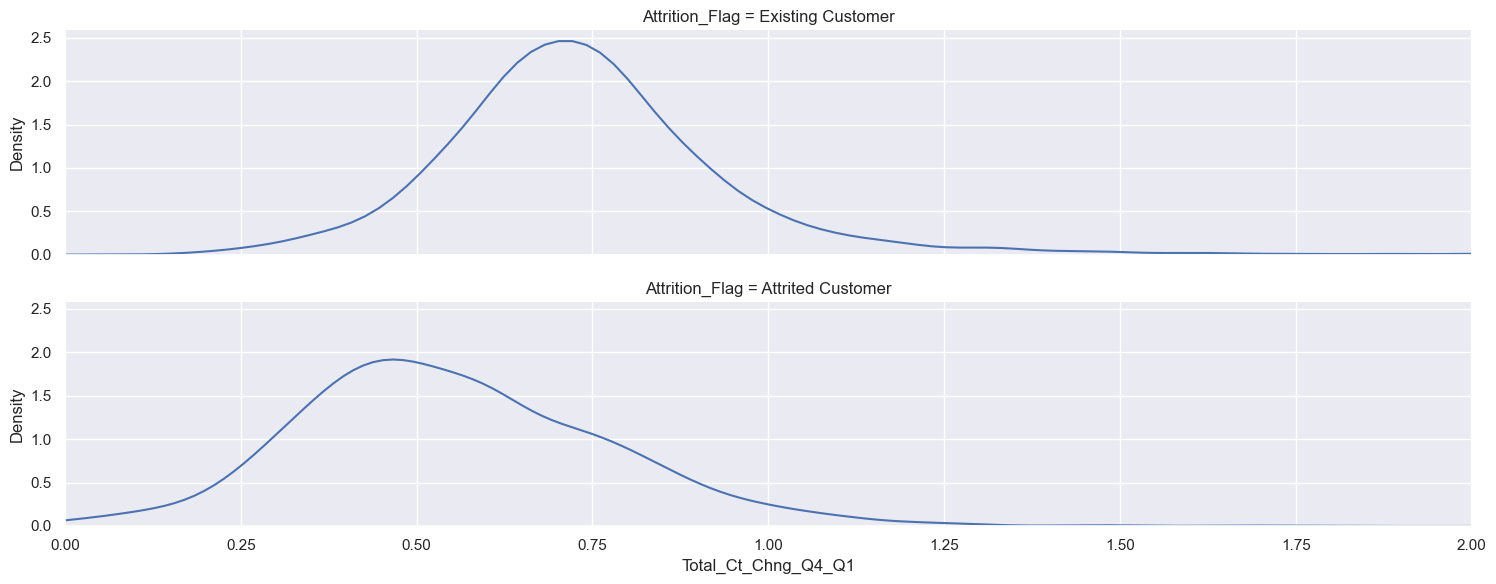

In [13]:
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")

plt.xlim(0,2);